In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import kurtosis

from datetime import datetime
from datetime import timedelta

## Read Data

In [2]:
btc  = pd.read_csv('bitcoin-usd.csv', parse_dates=['date'])
sp500   = pd.read_csv('sp500.csv', parse_dates=['date'])
gold_uscpi = pd.read_csv('monthly_data.csv', parse_dates=['date'])

In [3]:
btc

,date,open,high,low,close,volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,2.658010e+07
...,...,...,...,...,...,...
2614,2021-11-13,64158.121094,64915.675781,63303.734375,64469.527344,3.047423e+10
2615,2021-11-14,64455.371094,65495.179688,63647.808594,65466.839844,2.512209e+10
2616,2021-11-15,65521.289063,66281.570313,63548.144531,63557.871094,3.055876e+10
2617,2021-11-16,63721.195313,63721.195313,59016.335938,60161.246094,4.684434e+10


In [4]:
sp500

,date,open,high,low,close,volume
0,2014-09-17,1999.300049,2010.739990,1993.290039,2001.569946,3209420000
1,2014-09-18,2003.069946,2012.339966,2003.069946,2011.359985,3235340000
2,2014-09-19,2012.739990,2019.260010,2006.589966,2010.400024,4880220000
3,2014-09-22,2009.079956,2009.079956,1991.010010,1994.290039,3349670000
4,2014-09-23,1992.780029,1995.410034,1982.770020,1982.770020,3279350000
...,...,...,...,...,...,...
1800,2021-11-09,4707.250000,4708.529785,4670.870117,4685.250000,3110230000
1801,2021-11-10,4670.259766,4684.850098,4630.859863,4646.709961,3581630000
1802,2021-11-11,4659.390137,4664.549805,4648.310059,4649.270020,2623140000
1803,2021-11-12,4655.240234,4688.470215,4650.770020,4682.850098,2865790000


In [5]:
gold_uscpi

,date,gold_usd,cpi_us
0,2014-09-01,1241.330,237.852
1,2014-10-01,1223.565,238.031
2,2014-11-01,1176.413,237.433
3,2014-12-01,1200.440,236.151
4,2015-01-01,1249.333,234.812
...,...,...,...
82,2021-07-01,1774.800,271.696
83,2021-08-01,1817.000,273.003
84,2021-09-01,1816.700,273.567
85,2021-10-01,1757.200,274.310


## Data Manipulation

##### Merging Data

In [6]:
# Merge data and convert to monthly frequency
merged1 = sp500.merge(btc, on = 'date', how = 'left', suffixes=['_sp500','_btc']).dropna()
merged1.set_index('date', inplace=True)
merged1_last = merged1.resample('M').last()

merged1_last

,open_sp500,high_sp500,low_sp500,close_sp500,volume_sp500,open_btc,high_btc,low_btc,close_btc,volume_btc
date,,,,,,,,,,
2014-09-30,1978.209961,1985.170044,1968.959961,1972.290039,3951100000,376.088013,390.976990,373.442993,386.944000,3.470730e+07
2014-10-31,2001.199951,2018.189941,2001.199951,2018.050049,4292290000,345.009003,348.045013,337.141998,338.321014,1.254540e+07
2014-11-30,2074.780029,2075.760010,2065.060059,2067.560059,2504640000,369.373993,382.838013,358.454987,376.446991,2.294650e+07
2014-12-31,2082.110107,2085.580078,2057.939941,2058.899902,2606070000,310.914001,320.192993,310.210999,320.192993,1.394290e+07
2015-01-31,2019.349976,2023.319946,1993.380005,1994.989990,4568650000,232.772003,242.850998,225.839005,226.425003,2.660520e+07
...,...,...,...,...,...,...,...,...,...,...
2021-07-31,4395.120117,4412.250000,4389.649902,4395.259766,2861600000,40027.484375,42235.546875,38397.355469,42235.546875,3.307278e+10
2021-08-31,4529.750000,4531.390137,4515.799805,4522.680176,3090380000,47024.339844,48189.550781,46750.093750,47166.687500,3.473036e+10
2021-09-30,4370.669922,4382.549805,4306.240234,4307.540039,3123770000,41551.269531,44092.601563,41444.582031,43790.894531,3.114168e+10


In [7]:
# Merge SP500 & BTC with Gold Data
gold_uscpi['date'] = gold_uscpi['date'] - timedelta(days=1)
gold_uscpi.set_index('date', inplace=True)

merged2 = merged1_last.merge(gold_uscpi, left_index=True, right_index=True)
merged2.drop(['open_sp500','high_sp500','low_sp500','volume_sp500','open_btc','high_btc','low_btc','volume_btc'], axis=1, inplace=True)
merged2

,close_sp500,close_btc,gold_usd,cpi_us
date,,,,
2014-09-30,1972.290039,386.944000,1223.565,238.031
2014-10-31,2018.050049,338.321014,1176.413,237.433
2014-11-30,2067.560059,376.446991,1200.440,236.151
2014-12-31,2058.899902,320.192993,1249.333,234.812
2015-01-31,1994.989990,226.425003,1231.100,233.707
...,...,...,...,...
2021-06-30,4297.500000,35040.835938,1774.800,271.696
2021-07-31,4395.259766,42235.546875,1817.000,273.003
2021-08-31,4522.680176,47166.687500,1816.700,273.567


In [8]:
# Calculate simple returns of the assets over time
merged2['btc_return'] = merged2['close_btc'].pct_change()
merged2['sp500_return'] = merged2['close_sp500'].pct_change()
merged2['gold_return'] = merged2['gold_usd'].pct_change()

# Calculate standardized return
merged2['close_sp500_std'] = merged2.close_sp500 / merged2.close_sp500[0] * 100
merged2['close_btc_std'] = merged2.close_btc / merged2.close_btc[0] * 100
merged2['close_gold_std'] = merged2.gold_usd / merged2.gold_usd[0] * 100

merged2

,close_sp500,close_btc,gold_usd,cpi_us,btc_return,sp500_return,gold_return,close_sp500_std,close_btc_std,close_gold_std
date,,,,,,,,,,
2014-09-30,1972.290039,386.944000,1223.565,238.031,NaN,NaN,NaN,100.000000,100.000000,100.000000
2014-10-31,2018.050049,338.321014,1176.413,237.433,-0.125659,0.023201,-0.038537,102.320146,87.434103,96.146343
2014-11-30,2067.560059,376.446991,1200.440,236.151,0.112692,0.024534,0.020424,104.830426,97.287202,98.110031
2014-12-31,2058.899902,320.192993,1249.333,234.812,-0.149434,-0.004189,0.040729,104.391335,82.749182,102.105977
2015-01-31,1994.989990,226.425003,1231.100,233.707,-0.292848,-0.031041,-0.014594,101.150944,58.516220,100.615823
...,...,...,...,...,...,...,...,...,...,...
2021-06-30,4297.500000,35040.835938,1774.800,271.696,-0.018398,0.022214,-0.072679,217.893916,9055.789969,145.051550
2021-07-31,4395.259766,42235.546875,1817.000,273.003,0.205324,0.022748,0.023777,222.850579,10915.157458,148.500488
2021-08-31,4522.680176,47166.687500,1816.700,273.567,0.116753,0.028990,-0.000165,229.311110,12189.538409,148.475970


##### Technical Analysis

In [9]:
def tech_analysis(df):
    
    df['return'] = df.pct_change()
    df['cummulative_return'] = (df['return']+1).cumprod()
    
    cum_rets = df['cummulative_return']
    running_max = np.maximum.accumulate(cum_rets.dropna())
    running_max[running_max<1]=1
    drawdown = cum_rets/running_max -1
    
    tech_analysis={}    
    tech_analysis['sharpe'] = df['return'].mean() * 12 /df['return'].std() * np.sqrt(12)
    tech_analysis['sortino'] = df['return'].mean() * 12 /df[df['return']<0]['return'].std() * np.sqrt(12)
    tech_analysis['calmar'] = df['return'].mean() * 12 /abs(drawdown).max()
    
    percentiles = np.percentile(df['return'].dropna(),[5,95])
    tech_analysis['tail_ratio'] = abs(percentiles[1])/abs(percentiles[0])
    tech_analysis['ValueAtRisk_95']  = np.percentile(df['return'].dropna(),[5])[0]
    tech_analysis['CondValueAtRisk_95']  = df[df['return']<np.percentile(df['return'].dropna(),[5])[0]]['return'].mean()
    
    df['cummulative_return'] = (df['return']+1).cumprod()
    tech_analysis['cummulative_return'] = df['cummulative_return'].values[-1]
    
    tech_analysis['kurtosis'] = kurtosis(df['return'].dropna())

    tech_analysis['monthly_returns_std'] = df['return'].std()
    tech_analysis['daily_returns_std'] = tech_analysis['monthly_returns_std'] /  np.sqrt(21)
    tech_analysis['weekly_returns_std'] = tech_analysis['monthly_returns_std'] / np.sqrt(4)
    tech_analysis['yearly_returns_std'] = tech_analysis['monthly_returns_std'] * np.sqrt(12)
    
    tech_analysis['monthly_return_av'] = df['return'].mean()
    tech_analysis['annual_return_av'] = (1 + tech_analysis['monthly_return_av']) ** 12 - 1
    
    return df,tech_analysis

In [10]:
# Technical Analysis from Close Price
btc_dfta,btc_tech_analysis = tech_analysis(merged2.loc[:, ['close_btc']])
sp500_dfta,sp500_tech_analysis = tech_analysis(merged2.loc[:, ['close_sp500']])
gold_dfta,gold_tech_analysis = tech_analysis(merged2.loc[:, ['gold_usd']])

In [11]:
# Summarizing the Technical Analysis 
summary_ta = pd.concat([
          pd.DataFrame.from_dict(gold_tech_analysis ,orient='index',columns=['gold']),
          pd.DataFrame.from_dict(btc_tech_analysis  ,orient='index',columns=['bitcoin']),
          pd.DataFrame.from_dict(sp500_tech_analysis,orient='index',columns=['sp500'])],axis=1)
summary_ta

,gold,bitcoin,sp500
sharpe,5.836484,15.172994,10.914294
sortino,10.622332,35.708635,14.103477
calmar,0.380063,1.365147,0.652635
tail_ratio,1.126855,1.884408,1.072801
ValueAtRisk_95,-0.054237,-0.285794,-0.065138
CondValueAtRisk_95,-0.065943,-0.330457,-0.087238
cummulative_return,1.459097,160.819046,2.335042
kurtosis,0.144800,-0.072086,1.389274
monthly_returns_std,0.036327,0.238141,0.041430
daily_returns_std,0.007927,0.051967,0.009041


#### Asset Cummulative Return

###### The Monthly Asset Performance graph shows the comparison of Bitcoin, S&P 500 and gold price. It indicates that during the period of seven years under consideration, Bitcoin outperformed both S&P 500 and gold by a significant margin. Initially, Bitcoin's price was lower than the other two assets, but it increased by several orders of magnitude, which is why the graph is presented on a logarithmic scale to make it clear. In linear scale, the increase in the price of Bitcoin would have obscured the price evolution of the other two assets and they would have appeared as a horizontal line. The analysis then moves from general to specific, where a detailed comparison of Bitcoin's outperformance against each asset is presented.

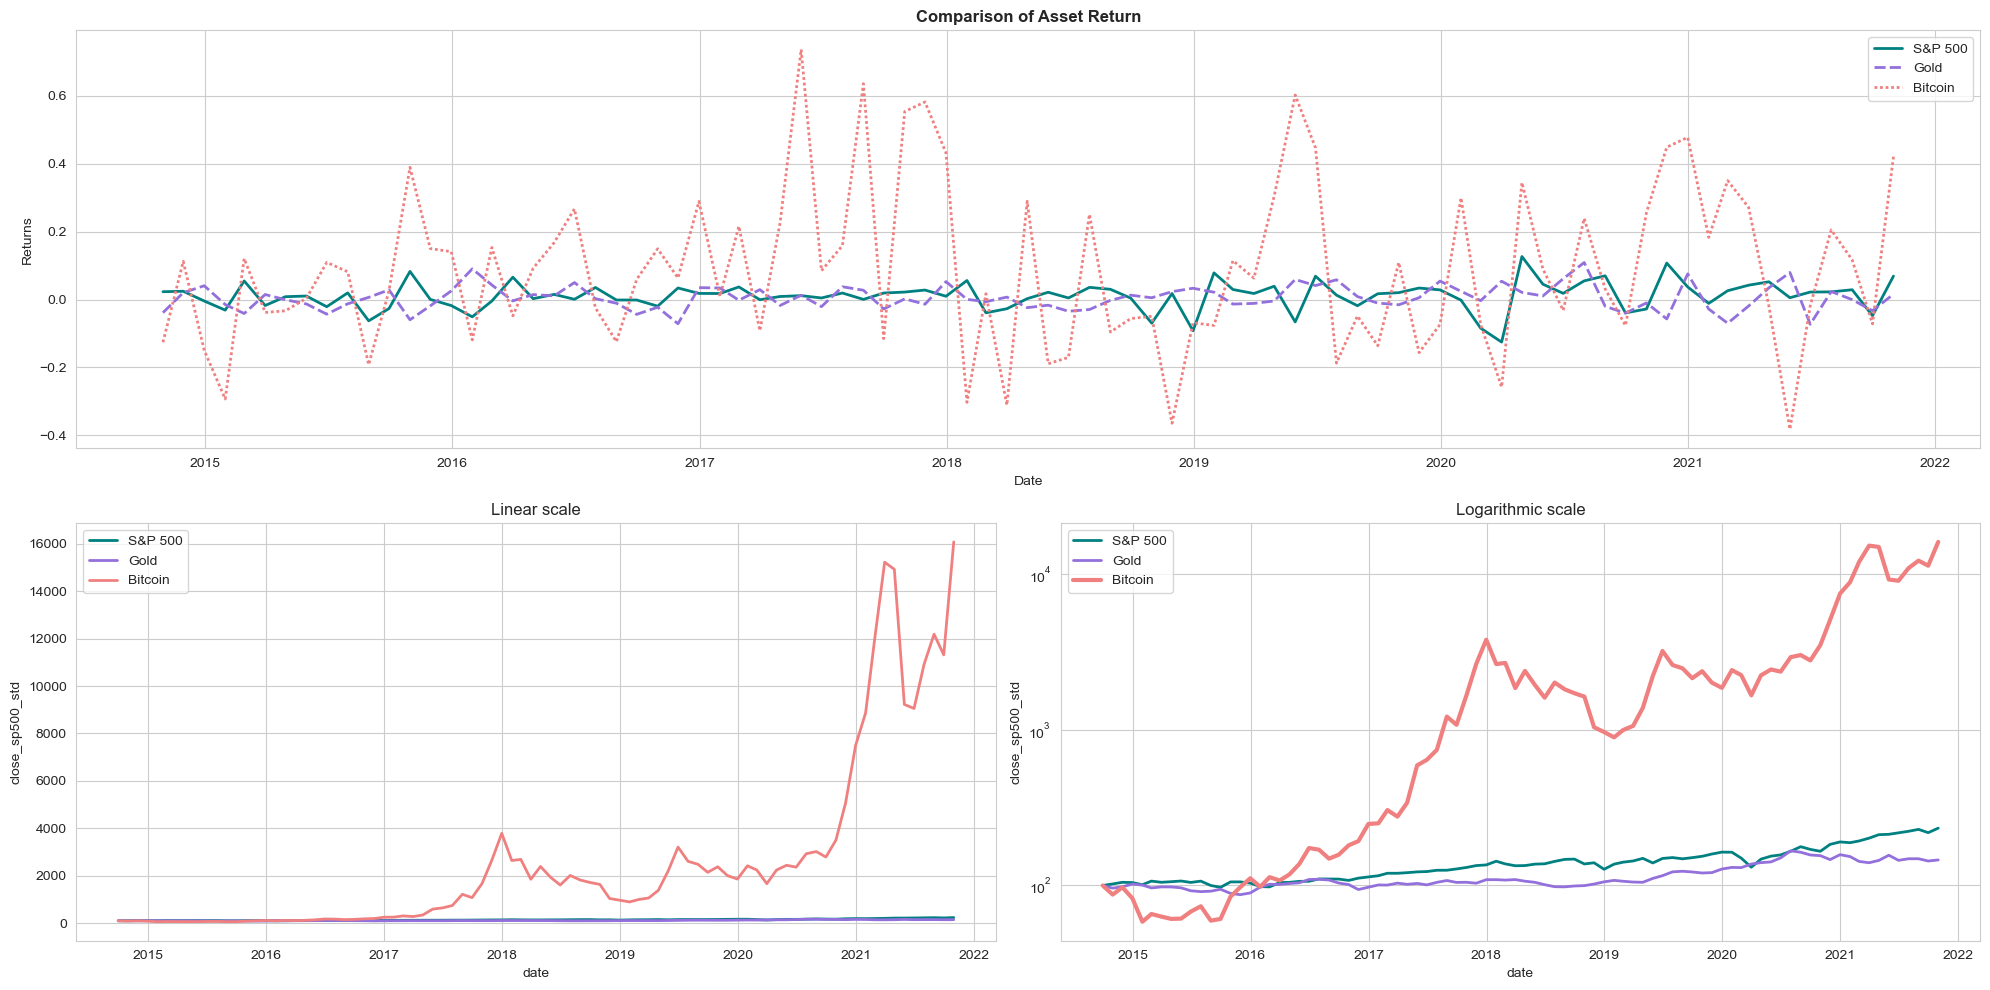

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.figure(figsize=(20, 10))

# First row
ax1 = plt.subplot(2, 1, 1)
sns.lineplot(data=merged2[['sp500_return', 'gold_return', 'btc_return']], ax=ax1, palette=['teal', 'MediumPurple', 'lightcoral'], lw=2)
ax1.legend(labels=['S&P 500', 'Gold', 'Bitcoin'])
ax1.set_xlabel('Date')
ax1.set_ylabel('Returns')
ax1.set_title('Comparison of Asset Return', fontweight='bold', y=1.0)

# Second row
ax2 = plt.subplot(2, 2, 3)
sns.lineplot(data=merged2, x=merged2.index, y='close_sp500_std', ax=ax2, color='teal', lw=2)
sns.lineplot(data=merged2, x=merged2.index, y='close_gold_std', ax=ax2, color='MediumPurple', lw=2)
sns.lineplot(data=merged2, x=merged2.index, y='close_btc_std', ax=ax2, color='lightcoral', lw=2)
ax2.set_title('Linear scale')
ax2.legend(['S&P 500','Gold','Bitcoin'])

ax3 = plt.subplot(2, 2, 4)
sns.lineplot(data=merged2, x=merged2.index, y='close_sp500_std', ax=ax3, color='teal', lw=2)
sns.lineplot(data=merged2, x=merged2.index, y='close_gold_std', ax=ax3, color='MediumPurple', lw=2)
sns.lineplot(data=merged2, x=merged2.index, y='close_btc_std', ax=ax3, color='lightcoral', lw=3)
ax3.set_title('Logarithmic scale')
ax3.legend(['S&P 500','Gold','Bitcoin'])
ax3.set_yscale('log')

plt.tight_layout()
plt.show()


##### The time series plot of monthly asset returns shows that Bitcoin returns are significantly more volatile than both the S&P 500 and gold returns. The study also found that Bitcoin returns vary significantly over time, while gold returns remain stationary throughout the seven-year period with the lowest amount of variability. S&P 500 returns, although exhibiting more variability than gold returns, are significantly less variable and volatile than Bitcoin returns. Interestingly, Bitcoin returns also appear somewhat nonstationary in the first half of the period under study. In conclusion, the study suggests that Bitcoin is generally a more volatile asset than the S&P 500 or gold

#### Monthly Comparison of Asset Price Movements

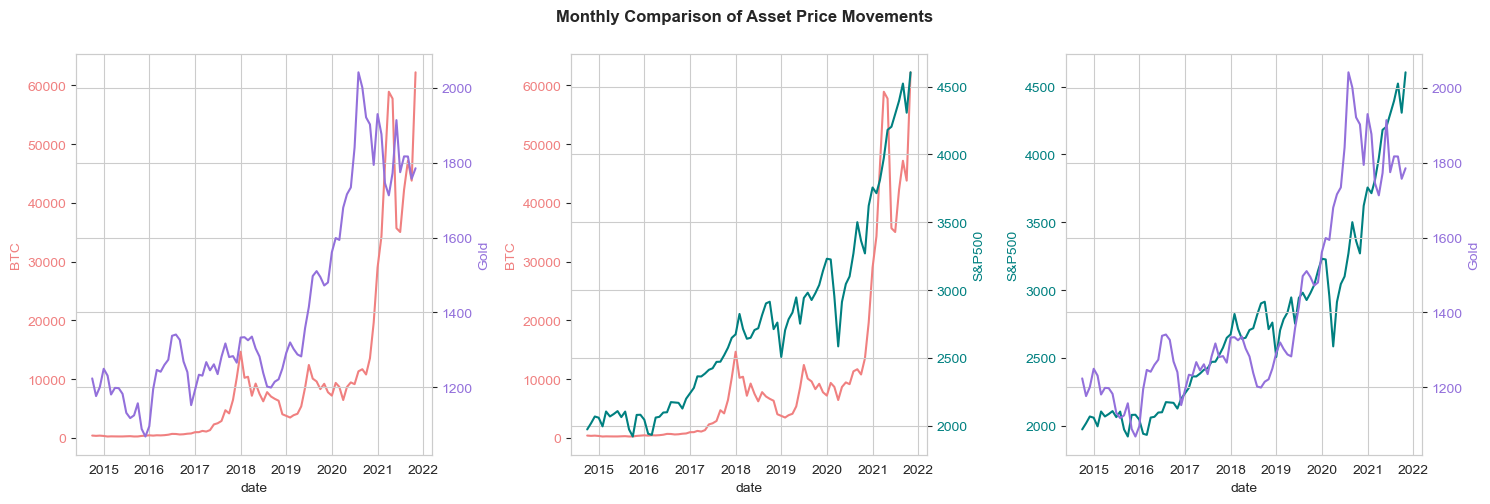

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
plt.suptitle('Monthly Comparison of Asset Price Movements', fontweight='bold', y=1.0)

sns.lineplot(x=merged2.index, y=merged2.close_btc, color='lightcoral', ax=ax[0])
ax[0].set_ylabel('BTC', color='lightcoral')
ax[0].tick_params(axis='y', labelcolor='lightcoral')
ax[0].grid(axis='y')

ax01 = ax[0].twinx()
sns.lineplot(x=merged2.index, y=merged2.gold_usd, color='MediumPurple', ax=ax01)
ax01.set_ylabel('Gold', color='MediumPurple')
ax01.tick_params(axis='y', labelcolor='MediumPurple')
ax01.grid(axis='x')

sns.lineplot(x=merged2.index, y=merged2.close_btc, color='lightcoral', ax=ax[1])
ax[1].set_ylabel('BTC', color='lightcoral')
ax[1].tick_params(axis='y', labelcolor='lightcoral')
ax[1].grid(axis='y')

ax11 = ax[1].twinx()
sns.lineplot(x=merged2.index, y=merged2.close_sp500, color='teal', ax=ax11)
ax11.set_ylabel('S&P500', color='teal')
ax11.tick_params(axis='y', labelcolor='teal')
ax11.grid(axis='x')

sns.lineplot(x=merged2.index, y=merged2.close_sp500, color='teal', ax=ax[2])
ax[2].set_ylabel('S&P500', color='teal')
ax[2].tick_params(axis='y', labelcolor='teal')
ax[2].grid(axis='y')

ax21 = ax[2].twinx()
sns.lineplot(x=merged2.index, y=merged2.gold_usd, color='MediumPurple', ax=ax21)
ax21.set_ylabel('Gold', color='MediumPurple')
ax21.tick_params(axis='y', labelcolor='MediumPurple')
ax21.grid(axis='x')

sns.set_style('whitegrid')

fig.tight_layout()
plt.show()


###### Bitcoin VS Gold
###### Bitcoin's price skyrocketing from 465 USD to close at 60,276 USD after reaching an all-time high of 68,789 USD. Meanwhile, the price per ounce of gold rose steadily from 1,241 USD to 1,785 USD over the same period, with its all-time high of 2,041 USD recorded during the Coronavirus pandemic when investors were fleeing to safety.

###### Bitcoin VS S&P500
###### In the past seven years, Bitcoin's price rose significantly higher than the S&P 500, with a gain of 14,000% from 465 USD to 60,276 USD and an all-time high of 68,789 USD. Meanwhile, the S&P 500 index only doubled over the same period, resulting in a return of just under 140% for investors. This significant outperformance has been attributed to Bitcoin's adoption as a store of value and a hedge against inflation, potentially indicating a tipping point in its adoption as a currency.

###### S&P500 VS Gold (need Analysis)
###### Bitcoin's price skyrocketing from 465 USD to close at 60,276 USD after reaching an all-time high of 68,789 USD. Meanwhile, the price per ounce of gold rose steadily from 1,241 USD to 1,785 USD over the same period, with its all-time high of 2,041 USD recorded during the Coronavirus pandemic when investors were fleeing to safety.

#### Asset Drawdown Analysis

In [14]:
def drawdown(df):
    #input asset return price
    cum_rets = (df+1).cumprod()
    running_max = np.maximum.accumulate(cum_rets.dropna())
    running_max[running_max<1]=1
    drawdown = cum_rets/running_max -1
    return drawdown

In [15]:
btc_drawdown   = drawdown(merged2['btc_return'])
sp500_drawdown = drawdown(merged2['sp500_return'])
gold_drawdown  = drawdown(merged2['gold_return'])

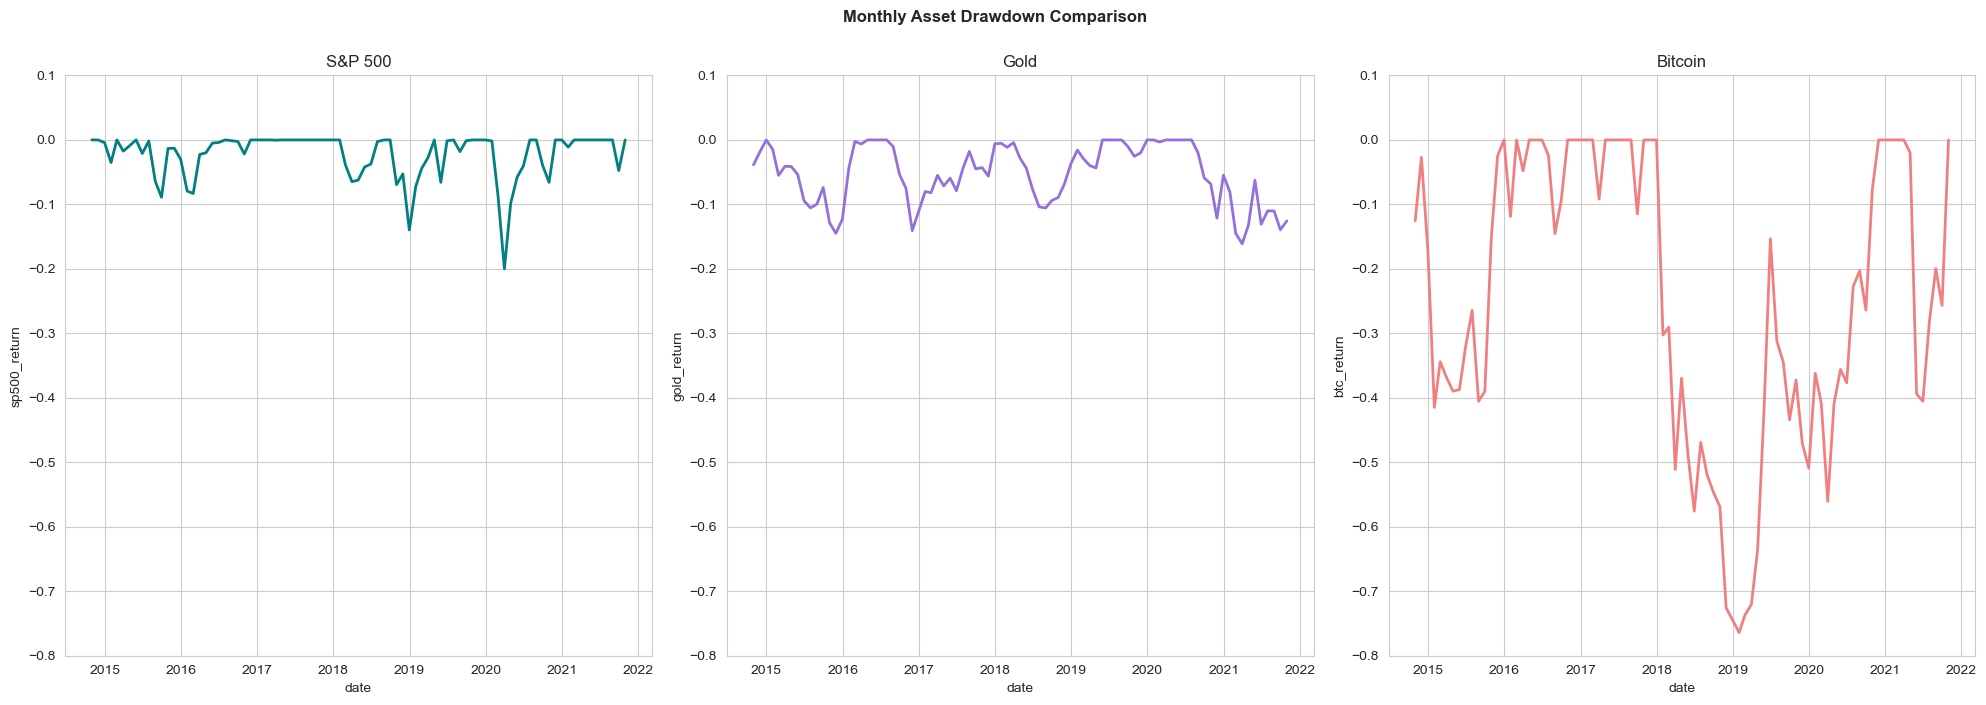

In [16]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(1,3,figsize=(20,7))
plt.suptitle('Monthly Asset Drawdown Comparison',fontweight='bold',y=1.0)

sns.lineplot(x=merged2.index, y=sp500_drawdown, ax=ax[0], color='teal', linewidth=2)
ax[0].set_title('S&P 500')
#ax[0].grid(axis='y')
ax[0].set_ylim(-0.8,0.1)

sns.lineplot(x=merged2.index, y=gold_drawdown, ax=ax[1], color='MediumPurple', linewidth=2)
ax[1].set_title('Gold')
#ax[1].grid(axis='y')
ax[1].set_ylim(-0.8,0.1)

sns.lineplot(x=merged2.index, y=btc_drawdown, ax=ax[2], color='lightcoral', linewidth=2)
ax[2].set_title('Bitcoin')
#ax[2].grid(axis='y')
ax[2].set_ylim(-0.8,0.1)

fig.tight_layout()
plt.show()

#### Daily Trading Volume of BTC and SP500

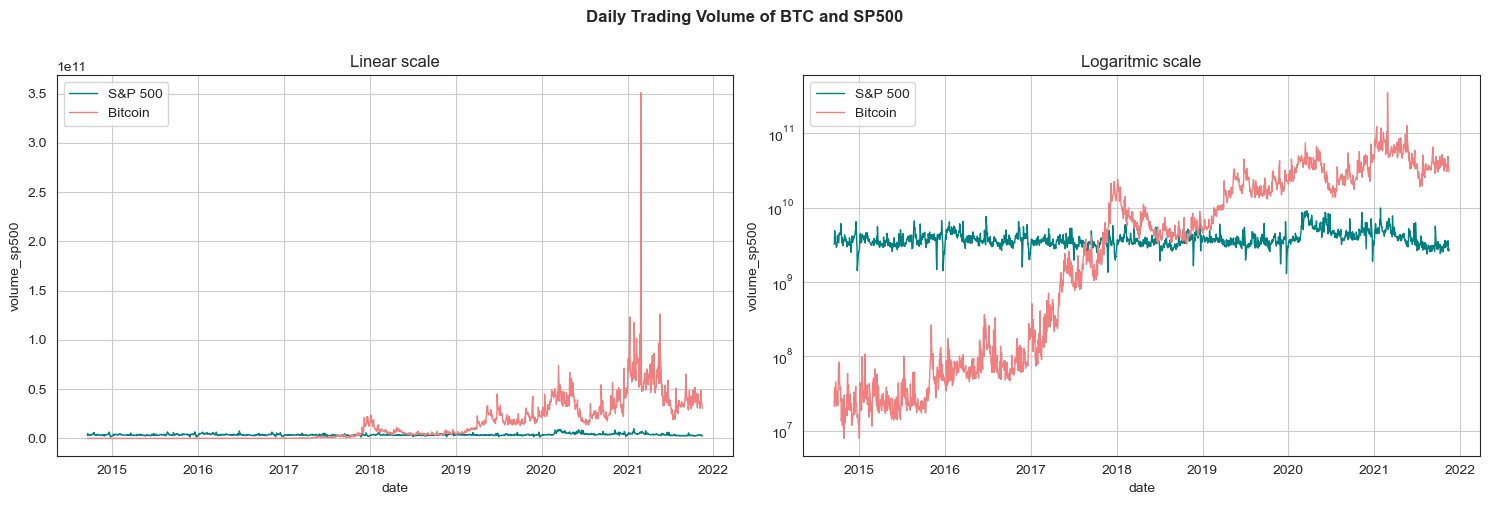

In [17]:
sns.set_style("white")

fig, ax = plt.subplots(1,2,figsize=(15,5))
plt.suptitle('Daily Trading Volume of BTC and SP500',fontweight='bold',y=1.0)

sns.lineplot(data=merged1, x=merged1.index, y="volume_sp500", color='teal', ax=ax[0], linewidth=1)
sns.lineplot(data=merged1, x=merged1.index, y="volume_btc", color='lightcoral', ax=ax[0], linewidth=1)
ax[0].set_title('Linear scale')
ax[0].legend(['S&P 500','Bitcoin'])
ax[0].grid(axis='y')
ax[0].grid(axis='x')

sns.lineplot(data=merged1, x=merged1.index, y="volume_sp500", color='teal', ax=ax[1], linewidth=1)
sns.lineplot(data=merged1, x=merged1.index, y="volume_btc", color='lightcoral', ax=ax[1], linewidth=1)
ax[1].set_title('Logaritmic scale')
ax[1].legend(['S&P 500','Bitcoin'])
ax[1].set_yscale('log')
ax[1].grid(axis='y')
ax[1].grid(axis='x')

fig.tight_layout()
plt.show()

##### Based on the analysis, it appears that Bitcoin has gained popularity in terms of trading volume compared to the relatively stable trading volume of S&P 500 stocks over the years. In late 2017, the daily trading volume of Bitcoin surpassed that of the S&P 500, and the margin between the two has widened significantly in recent times, with Bitcoin trading volumes averaging 12.5 times that of the S&P 500 so far in 2021. However, there is a note of caution regarding the accuracy of Bitcoin's trading volume data, which should be verified before being used for further analysis.

#### Monthly Distribution of Asset Return

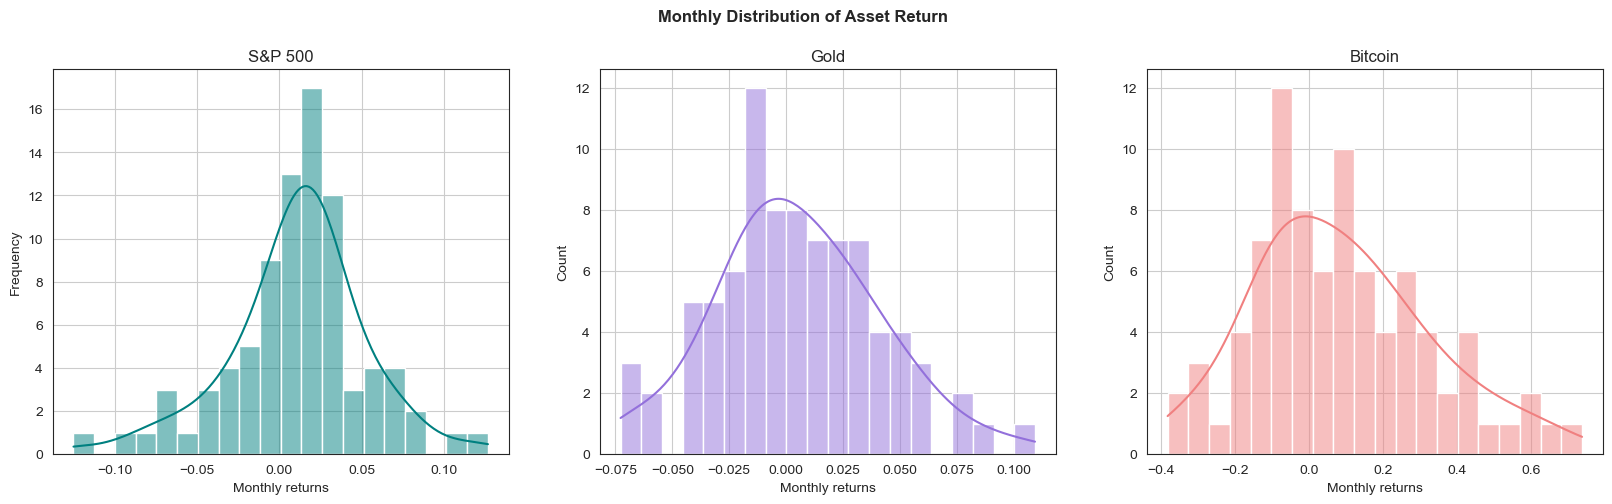

In [18]:
sns.set_style("white")

fig, ax = plt.subplots(1,3,figsize=(20,5))
plt.suptitle('Monthly Distribution of Asset Return',fontweight='bold',y=1.0)

sns.histplot(merged2['sp500_return'], ax=ax[0], kde=True, color='teal', bins=20)
ax[0].set_title('S&P 500')
ax[0].set_xlabel('Monthly returns')
ax[0].set_ylabel('Frequency')
ax[0].grid(axis='y')
ax[0].grid(axis='x')

sns.histplot(merged2['gold_return'], ax=ax[1], kde=True, color='MediumPurple', bins=20)
ax[1].set_title('Gold')
ax[1].set_xlabel('Monthly returns')
ax[1].grid(axis='y')
ax[1].grid(axis='x')

sns.histplot(merged2['btc_return'], ax=ax[2], kde=True, color='lightcoral', bins=20)
ax[2].set_title('Bitcoin')
ax[2].set_xlabel('Monthly returns')
ax[2].grid(axis='y')
ax[2].grid(axis='x')

plt.show()

###### Monthly Returns Distribution shows that Bitcoin has a higher probability of extreme gains or losses compared to the S&P 500 and gold, indicating high volatility but also potential opportunity. Gold, on the other hand, has a more balanced set of returns outcomes and significantly lower volatility, while the S&P 500 falls somewhere in between with medium volatility and positively cumulative returns in the long run.

#### Trading Range Analysis

In [19]:
# Add daily intraday trading ranges and plot (SP 500 & BTC only)
# The daily intraday range is calculated as the difference between the highest and lowest prices of the asset in a day, divided by the opening price of the asset that day.
# By dividing the difference between the highest and lowest prices of the asset in a day with the opening price of the asset that day, y
# we get a percentage value that can provide a better understanding of the price movements of the asset relative to its starting price

merged1['range_sp500'] = (merged1.high_sp500 - merged1.low_sp500) / merged1.open_sp500
merged1['range_btc'] = (merged1.high_btc - merged1.low_btc) / merged1.open_btc

merged1['avg_range_sp500'] = merged1.range_sp500.mean()
merged1['avg_range_btc'] = merged1.range_btc.mean()

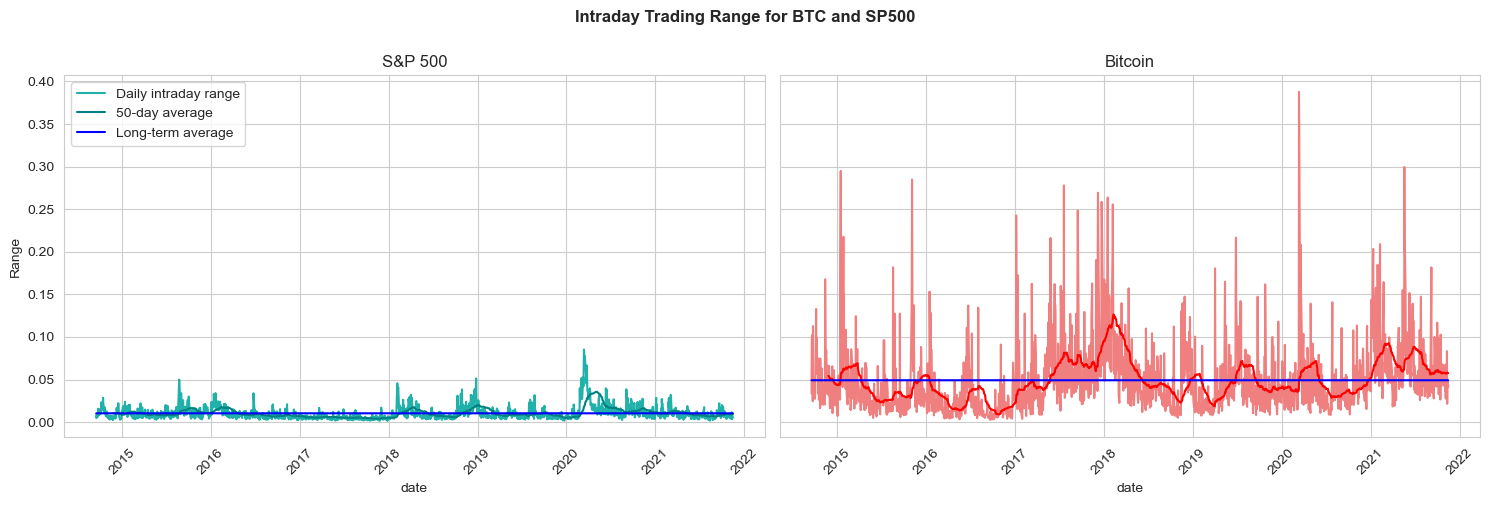

In [20]:

# Set style
sns.set_style("whitegrid")

# Visualize Intraday Trading Range for BTC and SP500
fig, ax = plt.subplots(1,2,figsize=(15,5),sharey=True)
fig.suptitle('Intraday Trading Range for BTC and SP500',fontweight='bold',y=1.0)

sns.lineplot(x=merged1.index, y=merged1.range_sp500, ax=ax[0], color='lightseagreen', label='Daily intraday range')
sns.lineplot(x=merged1.index, y=merged1.range_sp500.rolling(50).mean(), ax=ax[0], color='teal', label='50-day average')
sns.lineplot(x=merged1.index, y=merged1.avg_range_sp500, ax=ax[0], color='blue', label='Long-term average')
ax[0].set_title('S&P 500')
ax[0].set_ylabel('Range')
ax[0].legend(loc='upper left')

sns.lineplot(x=merged1.index, y=merged1.range_btc, ax=ax[1], color='lightcoral')
sns.lineplot(x=merged1.index, y=merged1.range_btc.rolling(50).mean(), ax=ax[1], color='red')
sns.lineplot(x=merged1.index, y=merged1.avg_range_btc, ax=ax[1], color='blue')
ax[1].set_ylabel('Range')
ax[1].set_title('Bitcoin')

# Set x-axis labels rotation to 45 degrees
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

fig.tight_layout()
plt.show()

##### If we want to talk about how risky Bitcoin can be, we can compare its daily trading range to S&P500. On average, Bitcoin's range is around 4.9%, while the S&P 500's range is only 1%. But what really catches your attention are the spikes! On those wild days, Bitcoin can swing as much as 30-40% in a single day, which is way more than what we see with stocks. These crazy ups and downs can be a real challenge when it comes to managing a portfolio and dealing with risk

### Asset Correlation

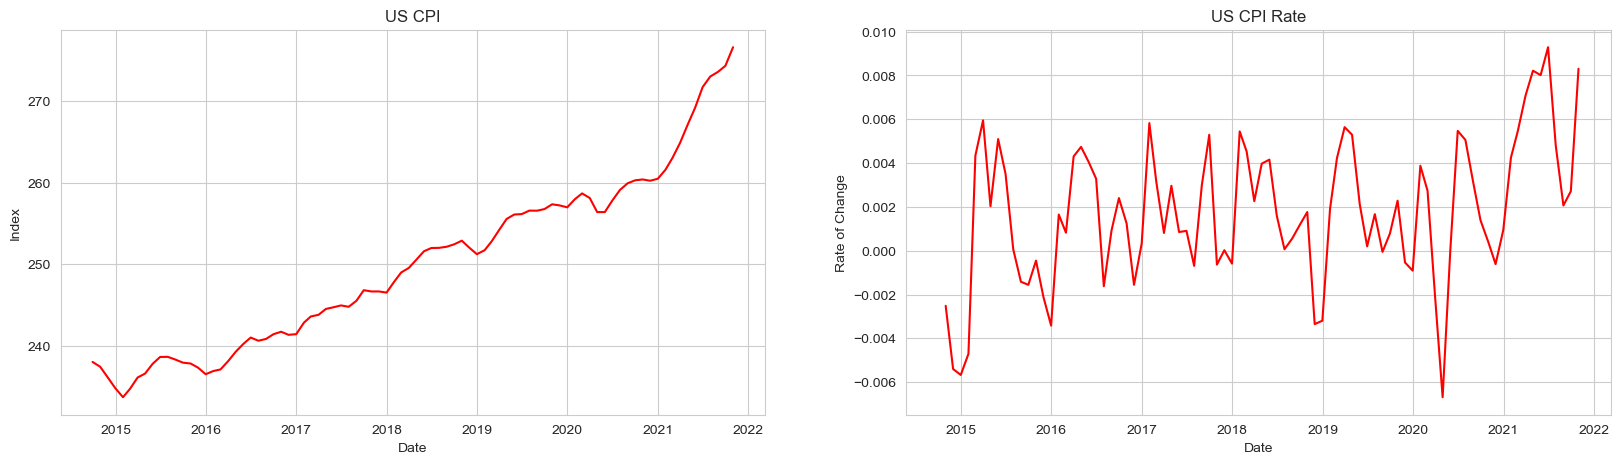

In [21]:
# Visualize Inflation rate in america
merged2['cpi_return'] = merged2['cpi_us'].pct_change() 

# Set style
sns.set_style("whitegrid")
sns.set_palette("Set2")

# Create figure and axes
fig, ax = plt.subplots(1, 2, figsize=(20, 5), sharex=True)

# Plot US CPI
sns.lineplot(data=merged2, x=merged2.index, y='cpi_us', ax=ax[0], color='red', linewidth=1.5)
ax[0].set_title('US CPI')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Index')
#ax[0].grid(axis='y')

# Plot US CPI Rate
sns.lineplot(data=merged2, x=merged2.index, y='cpi_return', ax=ax[1], color='red', linewidth=1.5)
ax[1].set_title('US CPI Rate')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Rate of Change')
#ax[1].grid(axis='y')

# Show plot
plt.show()

In [23]:
# Calculate Correlation and Covariance with US CPI

#asset_return = merged2[['btc_return','sp500_return','gold_return','cpi_return']].dropna()
#correlation = asset_return.dropna().corr()
#covariance  = asset_return.dropna().cov()
#print('-------------------- Asset Correlation --------------------')
#print()
#print(correlation2)
#print()
#print()
#print('-------------------- Asset Covariance --------------------')
#print()
#print(covariance2)

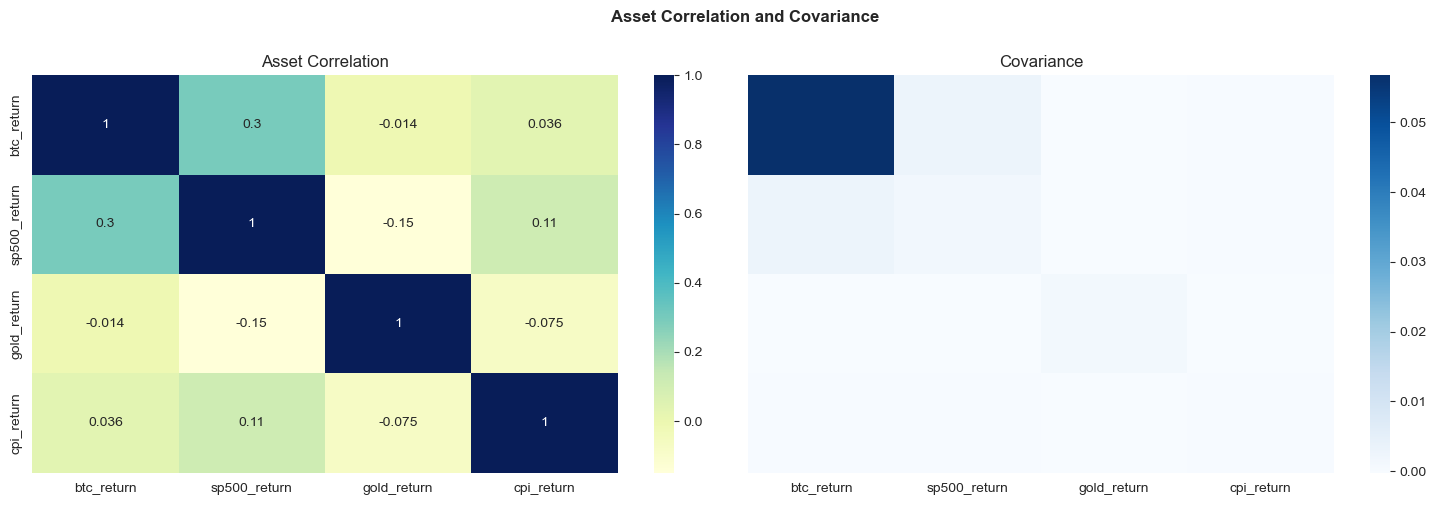

In [24]:
fig, ax = plt.subplots(1,2,figsize=(15,5),sharey=True)
plt.suptitle('Asset Correlation and Covariance',fontweight='bold',y=1.0)

sns.heatmap(data=correlation, ax=ax[0], annot=True, cmap='YlGnBu',cbar=True)
ax[0].set_title("Asset Correlation")

sns.heatmap(data=covariance , ax=ax[1], cmap='Blues', cbar=True)
ax[1].set_title("Covariance")

fig.tight_layout()
plt.show()

##### need paraphrase
##### Inflation reduces the real value of money, and consequently the amount of goods and services that can be exchanged for that money. Investing is a method of curtailing the effects of inflation. In order to curtail inflationary effects, the returns from the assets that make up the portfolio must be positively correlated with inflation, meaning that as inflation rises, the assets also generate positive returns.

##### As can be observed from the heatmap above, the S&P 500 is most positively correlated with the CPI, although the degree of correlation is a weak positive one. In general, as inflation increases, the S&P 500 index also rises. That makes the S&P 500 index the best hedge for inflation among the the three assets. Bitcoin and gold have no correlation to inflation, making them less suitable as inflation hedges. If a choice had to be made, however, Bitcoin has a slight edge over gold as an inflationary hedge due to its slight positive correlation to the CPI.

##### The heatmap above also showed that Bitcoin, gold and S&P 500 returns are all weakly corrlated at best, making them all ideal for inclusion into a portfolio. The rationale for including them all in the portfolio is that adding a risky asset whose returns are uncorrelated, or inversely correlated, with those of assets in the portfolio reduces the overall portfolio's risk by reducing volatility. Based on individual asset volatility, the first asset in the portfolio would be gold due to its low volatility. But what would the next asset be? According to the heatmap, gold is more inversely correlated with the S&P 500 than with Bitcoin. Therefore, adding the S&P 500 as the second asset would lower the portfolio's volatility. Finally, because Bitcoin is not correlated to gold, it is eligible for addition to the portfolio, although the benefits are slightly offset by Bitcoin's weak positive correlation to gold.

In [25]:
sp500_inflation = stats.linregress(merged2['sp500_return'],merged2['cpi_return'])
btc_inflation = stats.linregress(merged2['btc_return'],merged2['cpi_return'])
gold_inflation = stats.linregress(merged2['gold_return'],merged2['cpi_return'])

In [26]:
#Scatterplots with linear regression lines
sp = asset_return['sp500_return']
btc = asset_return['btc_return']
gold = asset_return['gold_return']
cpi = asset_return['cpi_return']

res1 = stats.linregress(sp, cpi)
res2 = stats.linregress(btc, cpi)
res3 = stats.linregress(gold, cpi)

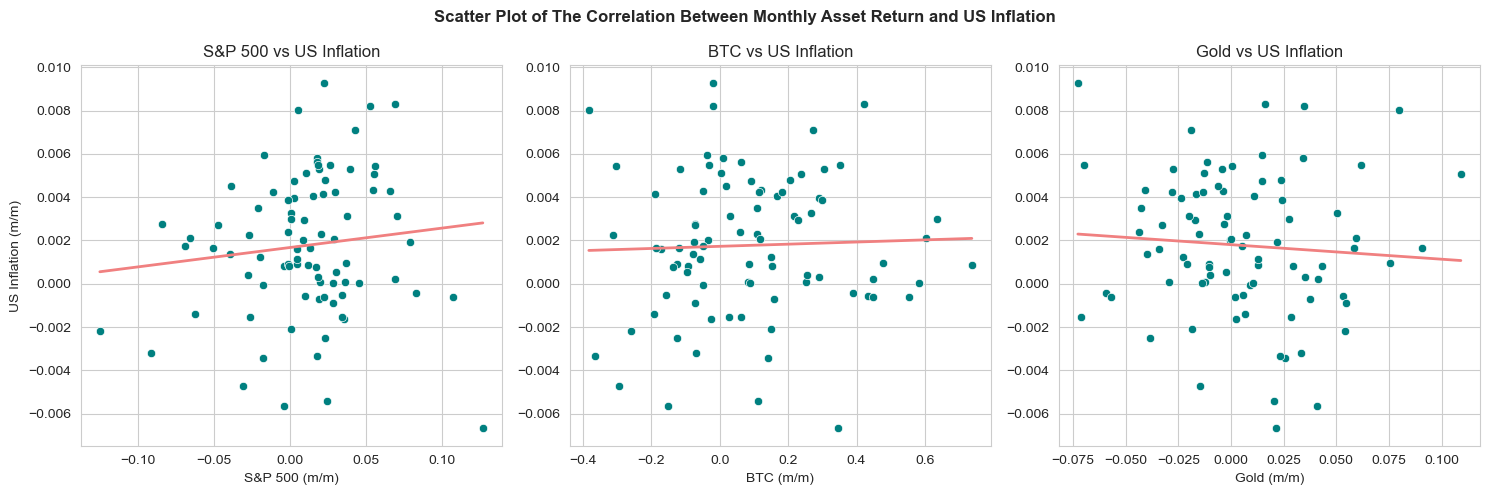

In [27]:
# Scatter plot of the correlation between assets and US inflation
fig, ax = plt.subplots(1,3, figsize=(15,5))
fig.suptitle('Scatter Plot of The Correlation Between Monthly Asset Return and US Inflation',fontweight='bold')

sns.scatterplot(x=sp, y=cpi, color='teal', ax=ax[0])
ax[0].set_xlabel('S&P 500 (m/m)')
ax[0].set_ylabel('US Inflation (m/m)')
ax[0].set_title('S&P 500 vs US Inflation')

fx0 = np.array([sp.min(), sp.max()])
fy0 = res1.intercept + res1.slope * fx0
ax[0].plot(fx0,fy0,color='lightcoral',lw=2)


sns.scatterplot(x=btc, y=cpi, color='teal', ax=ax[1])
ax[1].set_xlabel('BTC (m/m)')
ax[1].set_ylabel('')
ax[1].set_title('BTC vs US Inflation')

fx1 = np.array([btc.min(), btc.max()])
fy1 = res2.intercept + res2.slope * fx1
ax[1].plot(fx1,fy1,color='lightcoral',lw=2)


sns.scatterplot(x=gold, y=cpi, color='teal', ax=ax[2])
ax[2].set_xlabel('Gold (m/m)')
ax[2].set_ylabel('')
ax[2].set_title('Gold vs US Inflation')

fx2 = np.array([gold.min(), gold.max()])
fy2 = res3.intercept + res3.slope * fx2
ax[2].plot(fx2,fy2,color='lightcoral',lw=2)

fig.tight_layout()
plt.show()

## Portfolio Optimization

In [28]:
# Define Asset
assets = ['Bitcoin', 'S&P500', 'Gold']
num_assets = len(assets)
np.random.seed(36)
num_portfolios = 100

In [29]:
# Construct random weighted portfolios
sample_portfolios = np.random.randint(100, size=(num_portfolios, num_assets))
sample_portfolio_weights = [portfolio/sum(portfolio) for portfolio in sample_portfolios]
sample_portfolio_df = pd.DataFrame(sample_portfolio_weights, columns=assets)

In [30]:
# Compute annualised mean return and volatility for each sample portfolio 
asset_return_portfolio = asset_return.drop(['cpi_return'], axis=1)
asset_return_portfolio

,btc_return,sp500_return,gold_return
date,,,
2014-10-31,-0.125659,0.023201,-0.038537
2014-11-30,0.112692,0.024534,0.020424
2014-12-31,-0.149434,-0.004189,0.040729
2015-01-31,-0.292848,-0.031041,-0.014594
2015-02-28,0.121025,0.054893,-0.040991
...,...,...,...
2021-06-30,-0.018398,0.022214,-0.072679
2021-07-31,0.205324,0.022748,0.023777
2021-08-31,0.116753,0.028990,-0.000165


In [31]:
# Add new rows for Equal Weights Portfolio

new_row = pd.Series({'Bitcoin': 1/3, 'S&P500': 1/3, 'Gold': 1-(2/3)})
sample_portfolio_df.loc[len(sample_portfolio_df)] = new_row

In [32]:
sample_portfolio_df

,Bitcoin,S&P500,Gold
0,0.037594,0.736842,0.225564
1,0.245399,0.202454,0.552147
2,0.488889,0.100000,0.411111
3,0.440000,0.048000,0.512000
4,0.355469,0.371094,0.273438
...,...,...,...
96,0.118812,0.445545,0.435644
97,0.443299,0.180412,0.376289
98,0.109244,0.596639,0.294118
99,0.030769,0.461538,0.507692


In [33]:
# Compute annualised mean return
mean_asset_returns = asset_return_portfolio.mean()
annualised_asset_returns = ((1+mean_asset_returns)**12)-1
annualised_asset_returns

btc_return      1.718841
sp500_return    0.138634
gold_return     0.062953
dtype: float64

In [34]:
# Calculate annualised asset volatility
asset_volatility = asset_return_portfolio.std()
annualised_asset_volatility = asset_volatility * np.sqrt(12)
annualised_asset_volatility

btc_return      0.824944
sp500_return    0.143519
gold_return     0.125842
dtype: float64

In [35]:
# Add Annualised return and volatility into DataFrame

sample_portfolio_df['AnnualisedReturns'] = sample_portfolio_df.mul(annualised_asset_returns.to_numpy(), axis=1).sum(axis=1)
sample_portfolio_df['AnnualisedVolatility'] = sample_portfolio_df.iloc[:,:-1].mul(annualised_asset_volatility.to_numpy(), axis=1).sum(axis=1)
sample_portfolio_df

,Bitcoin,S&P500,Gold,AnnualisedReturns,AnnualisedVolatility
0,0.037594,0.736842,0.225564,0.180969,0.165149
1,0.245399,0.202454,0.552147,0.484628,0.300979
2,0.488889,0.100000,0.411111,0.880066,0.469393
3,0.440000,0.048000,0.512000,0.795176,0.434295
4,0.355469,0.371094,0.273438,0.679654,0.380911
...,...,...,...,...,...
96,0.118812,0.445545,0.435644,0.293411,0.216779
97,0.443299,0.180412,0.376289,0.810660,0.438942
98,0.109244,0.596639,0.294118,0.289002,0.212761
99,0.030769,0.461538,0.507692,0.148833,0.155511


In [37]:
annualised_asset_returns

btc_return      1.718841
sp500_return    0.138634
gold_return     0.062953
dtype: float64

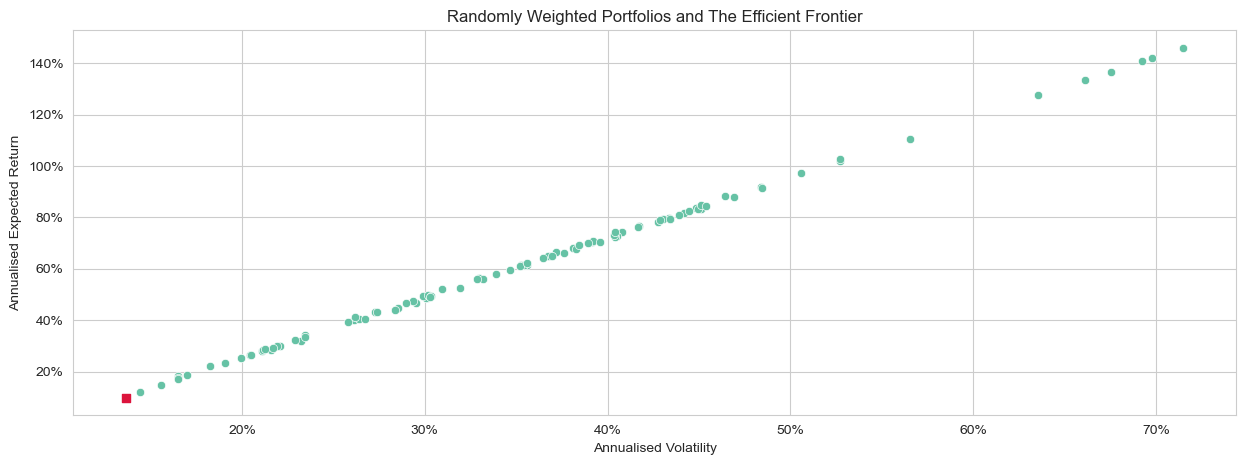

In [38]:
# Plot random portfolios
import matplotlib.ticker as mtick
plt.figure(figsize=(15,5))
sns.scatterplot(data=sample_portfolio_df, x='AnnualisedVolatility', y='AnnualisedReturns', palette='coolwarm')
plt.scatter(np.min(sample_portfolio_df['AnnualisedVolatility']), np.min(sample_portfolio_df['AnnualisedReturns']), marker='s', color='Crimson')
plt.title('Randomly Weighted Portfolios and The Efficient Frontier')
plt.xlabel('Annualised Volatility')
plt.ylabel('Annualised Expected Return')
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.show()

##### Portfolio Weighting based on Sharpe Ratio

In [39]:
# NOTE: Sharpe ratios can change quite significantly over time
# Assume risk-free rate = 0, calculate the sharpe ratio

risk_free = 0
sample_portfolio_df['Sharpe'] = (sample_portfolio_df['AnnualisedReturns'] - risk_free)/sample_portfolio_df['AnnualisedVolatility']
sample_portfolio_df

,Bitcoin,S&P500,Gold,AnnualisedReturns,AnnualisedVolatility,Sharpe
0,0.037594,0.736842,0.225564,0.180969,0.165149,1.095793
1,0.245399,0.202454,0.552147,0.484628,0.300979,1.610169
2,0.488889,0.100000,0.411111,0.880066,0.469393,1.874904
3,0.440000,0.048000,0.512000,0.795176,0.434295,1.830958
4,0.355469,0.371094,0.273438,0.679654,0.380911,1.784288
...,...,...,...,...,...,...
96,0.118812,0.445545,0.435644,0.293411,0.216779,1.353502
97,0.443299,0.180412,0.376289,0.810660,0.438942,1.846850
98,0.109244,0.596639,0.294118,0.289002,0.212761,1.358342
99,0.030769,0.461538,0.507692,0.148833,0.155511,0.957055


In [40]:
# Choose the best portofolio based on the Sharpe Ratio
MSR_portfolio = sample_portfolio_df.sort_values(by=['Sharpe'], ascending=False)
sharpe_weight = MSR_portfolio.iloc[0,:]

print("------------------- Portfolio Weights -------------------")
print(sharpe_weight)

print("\n------------------- Range of Sharpe Ratios -------------------")
print(sample_portfolio_df['Sharpe'].describe()[['min', 'max']])

------------------- Portfolio Weights -------------------
Bitcoin                 0.840909
S&P500                  0.056818
Gold                    0.102273
AnnualisedReturns       1.459705
AnnualisedVolatility    0.714727
Sharpe                  2.042323
Name: 91, dtype: float64

------------------- Range of Sharpe Ratios -------------------
min    0.716263
max    2.042323
Name: Sharpe, dtype: float64


In [41]:
MSR_portfolio.iloc[0,3]

1.4597046847513724

##### Assuming a risk-free rate of 0%, based on the Sharpe Ratio, the MSR portfolio suggests a heavy Bitcoin weight of 84%, followed by a gold weight of 10%, and an S&P 500 weight of 5.7% to compose an optimal portfolio. This portfolio achieves an estimated Sharpe ratio of 2, plus annualised returns of 145% and 71% annualised volatility. This result highlights the benefits of constructing a portfolio because the MSR portfolio is estimated to achieve higher returns than what gold and S&P 500 would achieve individually, along with the added benefit of lowering volatility below that of Bitcoin.

##### Portfolio Weighting based in Volatility

In [42]:
# Find optimal weights for GMV portfolio
GMV_portfolio = sample_portfolio_df.sort_values(by=['AnnualisedVolatility'], ascending=True)
GMV_portfolio

,Bitcoin,S&P500,Gold,AnnualisedReturns,AnnualisedVolatility,Sharpe
24,0.008403,0.277311,0.714286,0.097855,0.136619,0.716263
6,0.016949,0.372881,0.610169,0.119239,0.144282,0.826425
99,0.030769,0.461538,0.507692,0.148833,0.155511,0.957055
95,0.043478,0.496894,0.459627,0.172553,0.165021,1.045643
23,0.042683,0.530488,0.426829,0.173779,0.165059,1.052828
...,...,...,...,...,...,...
66,0.761905,0.150794,0.087302,1.335994,0.661157,2.020693
17,0.785124,0.049587,0.165289,1.366783,0.675600,2.023066
26,0.808081,0.080808,0.111111,1.407160,0.692201,2.032877
87,0.816667,0.058333,0.125000,1.419677,0.697806,2.034485


In [43]:

# Choose the best portofolio based on the Sharpe Ratio
vol_weight = GMV_portfolio.iloc[0]

print("------------------- Portfolio Weights -------------------")
print(vol_weight)

print("\n------------------- Range of Volatility -------------------")
print(sample_portfolio_df['AnnualisedVolatility'].describe()[['min', 'max']])

------------------- Portfolio Weights -------------------
Bitcoin                 0.008403
S&P500                  0.277311
Gold                    0.714286
AnnualisedReturns       0.097855
AnnualisedVolatility    0.136619
Sharpe                  0.716263
Name: 24, dtype: float64

------------------- Range of Volatility -------------------
min    0.136619
max    0.714727
Name: AnnualisedVolatility, dtype: float64


###### The GMV portfolio suggests a heavy gold weight of 71.4%, followed by an S&P 500 weight of 27.7%, and finally a miniscule Bitcoin weight of 0.8%. This is not particularly surprising considering that gold and the &P 500 both exhibit lower volatility than Bitcoin in absolute terms, therefore they would be given large weights in a portfolio that optimises for low volatility. Notably, the portfolio's estimated annualised return is higher than for gold alone, while the estimated volatility is also slightly higher than it would be for gold alone. Even though the portfolio is optimising for low volatility, an additional degree of risk is accepted in order to generate higher returns. On a negative note, the Sharpe ratio of this portfolio is approximately 0.7. This is an adverse situation for portfolio construction, and would seem to advocate for an investment solely in the S&P 500; such an action would yield similar returns with a higher return-to-risk ratio. However, for the purposes of diversification with minimal risk, this GMV portfolio will be considered acceptably optimal.

##### Portofolio Equal Weighting

In [44]:
# Equal Portfolio are in index 1000

equal_weight = sample_portfolio_df.iloc[100]

print("------------------- Portfolio Weights -------------------")
print(equal_weight)

print("\n------------------- Range of Volatility -------------------")
print(sample_portfolio_df['AnnualisedVolatility'].describe()[['min', 'max']])

------------------- Portfolio Weights -------------------
Bitcoin                 0.333333
S&P500                  0.333333
Gold                    0.333333
AnnualisedReturns       0.640143
AnnualisedVolatility    0.364768
Sharpe                  1.754930
Name: 100, dtype: float64

------------------- Range of Volatility -------------------
min    0.136619
max    0.714727
Name: AnnualisedVolatility, dtype: float64


In [45]:
equal_dict = dict(zip(equal_weight.index, equal_weight.values))
equal_dict

{'Bitcoin': 0.3333333333333333,
 'S&P500': 0.3333333333333333,
 'Gold': 0.33333333333333337,
 'AnnualisedReturns': 0.6401426114224487,
 'AnnualisedVolatility': 0.3647681904373186,
 'Sharpe': 1.754929920437923}

##### Make a Dataframe of it

In [46]:
sharpe_dict = dict(zip(sharpe_weight.index, sharpe_weight.values))
vol_dict = dict(zip(vol_weight.index, vol_weight.values))
equal_dict = dict(zip(equal_weight.index, equal_weight.values))

In [47]:
summary_port = [sharpe_dict, vol_dict, equal_dict]

# Create a DataFrame
summary_port_df = pd.DataFrame(summary_port, index=['Max Sharpe Portfolio', 'Min Volatility Portfolio', 'Equal Portfolio'])

# Print the DataFrame
summary_port_df

,Bitcoin,S&P500,Gold,AnnualisedReturns,AnnualisedVolatility,Sharpe
Max Sharpe Portfolio,0.840909,0.056818,0.102273,1.459705,0.714727,2.042323
Min Volatility Portfolio,0.008403,0.277311,0.714286,0.097855,0.136619,0.716263
Equal Portfolio,0.333333,0.333333,0.333333,0.640143,0.364768,1.754930


### Comparing 3 types of Portfolio

In [48]:
# Calculate return for each portfolio
asset_return_portfolio['MSR_Return']   = asset_return_portfolio.mul(np.array(sharpe_weight.iloc[0:3]), axis=1).sum(axis=1)
asset_return_portfolio['GMV_Return']   = asset_return_portfolio.iloc[:,:-1].mul(np.array(vol_weight.iloc[0:3]), axis=1).sum(axis=1)
asset_return_portfolio['Equal_Return'] = asset_return_portfolio.iloc[:,:-2].mul(np.array(equal_weight.iloc[0:3]), axis=1).sum(axis=1)

In [49]:
asset_return_portfolio

,btc_return,sp500_return,gold_return,MSR_Return,GMV_Return,Equal_Return
date,,,,,,
2014-10-31,-0.125659,0.023201,-0.038537,-0.108291,-0.022148,-0.046998
2014-11-30,0.112692,0.024534,0.020424,0.098246,0.022339,0.052550
2014-12-31,-0.149434,-0.004189,0.040729,-0.121733,0.026675,-0.037631
2015-01-31,-0.292848,-0.031041,-0.014594,-0.249515,-0.021493,-0.112828
2015-02-28,0.121025,0.054893,-0.040991,0.100697,-0.013040,0.044975
...,...,...,...,...,...,...
2021-06-30,-0.018398,0.022214,-0.072679,-0.021642,-0.045908,-0.022954
2021-07-31,0.205324,0.022748,0.023777,0.176383,0.025017,0.083950
2021-08-31,0.116753,0.028990,-0.000165,0.099809,0.008903,0.048526


In [50]:
# Calculate cummulative return for each portfolio
cum_asset_return_portfolio = ((1+asset_return_portfolio).cumprod() - 1) * 100
cum_asset_return_portfolio

,btc_return,sp500_return,gold_return,MSR_Return,GMV_Return,Equal_Return
date,,,,,,
2014-10-31,-12.565897,2.320146,-3.853657,-10.829075,-2.214806,-4.699803
2014-11-30,-2.712798,4.830426,-1.889969,-2.068365,-0.030387,0.308199
2014-12-31,-17.250818,4.391335,2.105977,-13.989872,2.636304,-3.466512
2015-01-31,-41.483780,1.150944,0.615823,-35.450698,0.430313,-14.358172
2015-02-28,-34.401876,6.703373,-3.508518,-28.950756,-0.879295,-10.506398
...,...,...,...,...,...,...
2021-06-30,8955.789969,117.893916,45.051550,6196.469440,76.210139,955.701706
2021-07-31,10815.157458,122.850579,48.500488,7307.058133,80.618476,1044.327510
2021-08-31,12089.538409,129.311110,48.475970,8046.350910,82.226440,1099.857389


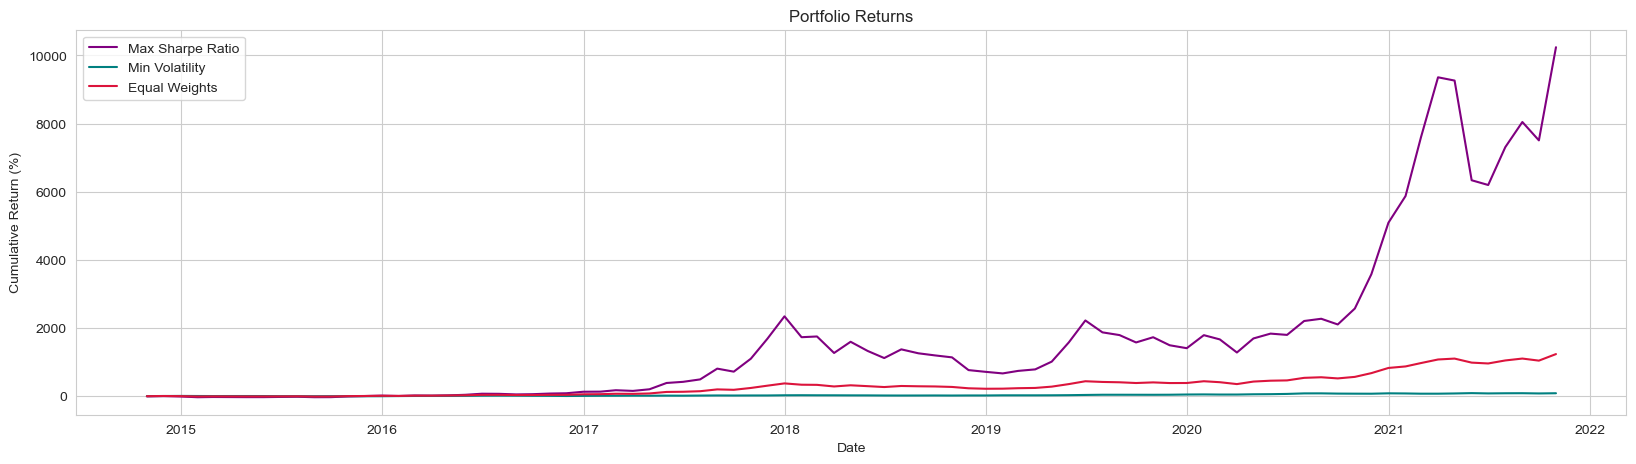

In [51]:
# Set the seaborn style
sns.set_style("whitegrid")

plt.figure(figsize=(20,5))
plt.plot(cum_asset_return_portfolio['MSR_Return'], label='Max Sharpe Ratio', color='purple')
plt.plot(cum_asset_return_portfolio['GMV_Return'], label='Min Volatility', color='Teal')
plt.plot(cum_asset_return_portfolio['Equal_Return'], label='Equal Weights', color='Crimson')
plt.legend()
plt.title('Portfolio Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (%)')
#plt.grid(axis='y')
#plt.grid(axis='x')
plt.show()

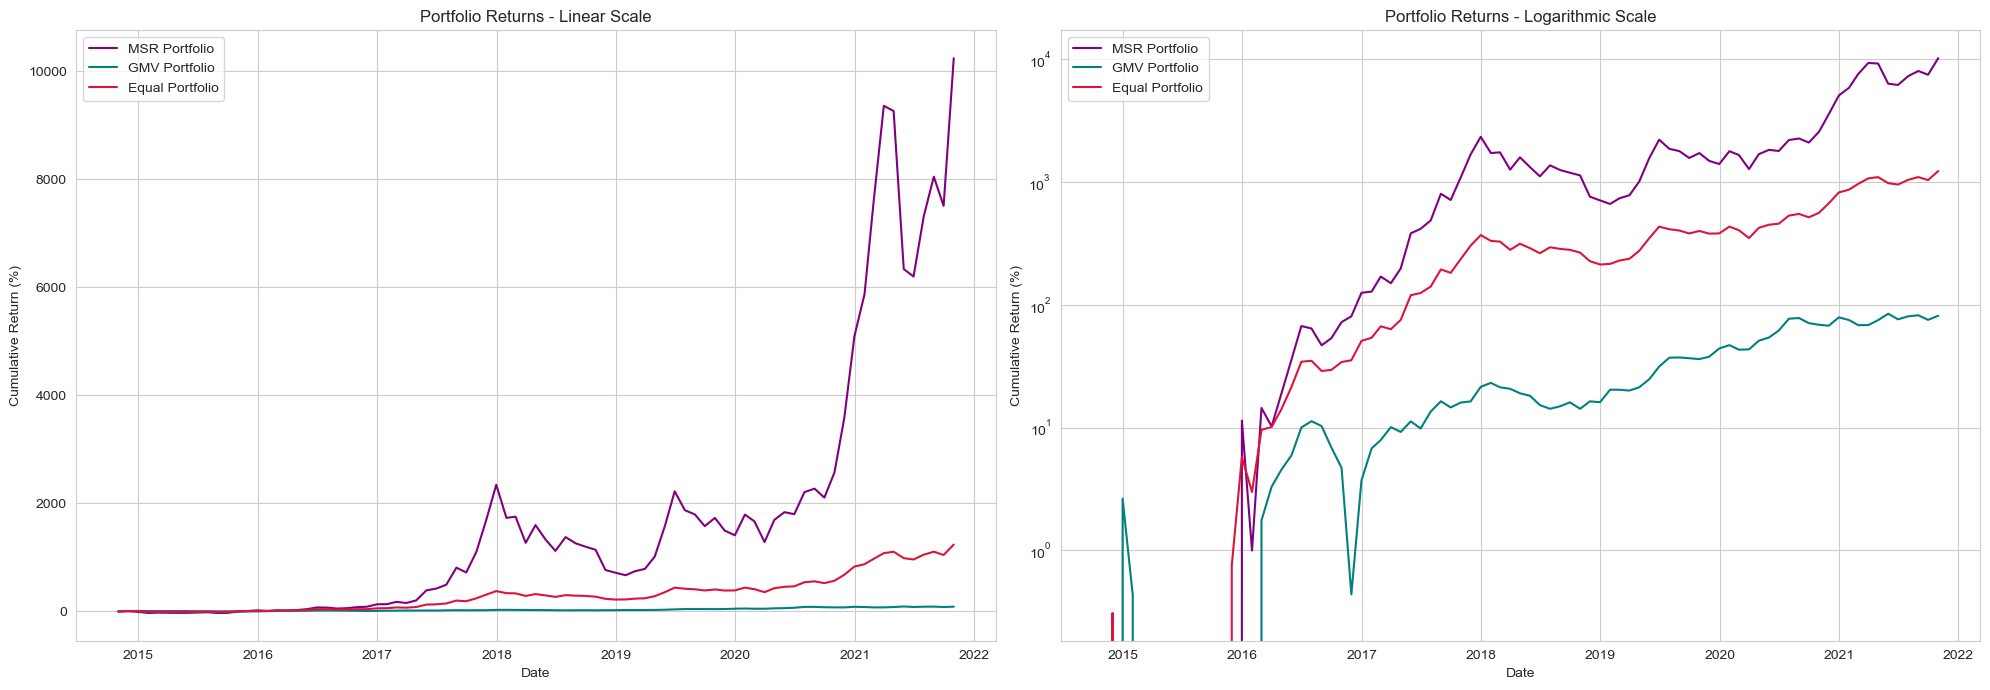

In [52]:
# Set the seaborn style
sns.set_style("whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# Linear scale subplot
axes[0].plot(cum_asset_return_portfolio['MSR_Return'], label='MSR Portfolio', color='purple')
axes[0].plot(cum_asset_return_portfolio['GMV_Return'], label='GMV Portfolio', color='Teal')
axes[0].plot(cum_asset_return_portfolio['Equal_Return'], label='Equal Portfolio', color='Crimson')
axes[0].legend()
axes[0].set_title('Portfolio Returns - Linear Scale')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Cumulative Return (%)')

# Logarithmic scale subplot
axes[1].plot(cum_asset_return_portfolio['MSR_Return'], label='MSR Portfolio', color='purple')
axes[1].plot(cum_asset_return_portfolio['GMV_Return'], label='GMV Portfolio', color='Teal')
axes[1].plot(cum_asset_return_portfolio['Equal_Return'], label='Equal Portfolio', color='Crimson')
axes[1].legend()
axes[1].set_title('Portfolio Returns - Logarithmic Scale')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Cumulative Return (%)')
axes[1].set_yscale('log')  # Set y-axis to logarithmic scale

plt.tight_layout()
plt.show()


In [53]:
# GMV historical drawdown
gmv_cum_returns = cum_asset_return_portfolio['MSR_Return']
running_max = np.maximum.accumulate(gmv_cum_returns)
running_max[running_max < 1] = 1
msr_drawdown = (gmv_cum_returns)/running_max - 1

# GMV historical drawdown
msr_cum_returns = cum_asset_return_portfolio['GMV_Return']
running_max = np.maximum.accumulate(msr_cum_returns)
running_max[running_max < 1] = 1
gmv_drawdown = (msr_cum_returns)/running_max - 1

# Equal historical drawdown
msr_cum_returns = cum_asset_return_portfolio['Equal_Return']
running_max = np.maximum.accumulate(msr_cum_returns)
running_max[running_max < 1] = 1
eq_drawdown = (msr_cum_returns)/running_max - 1

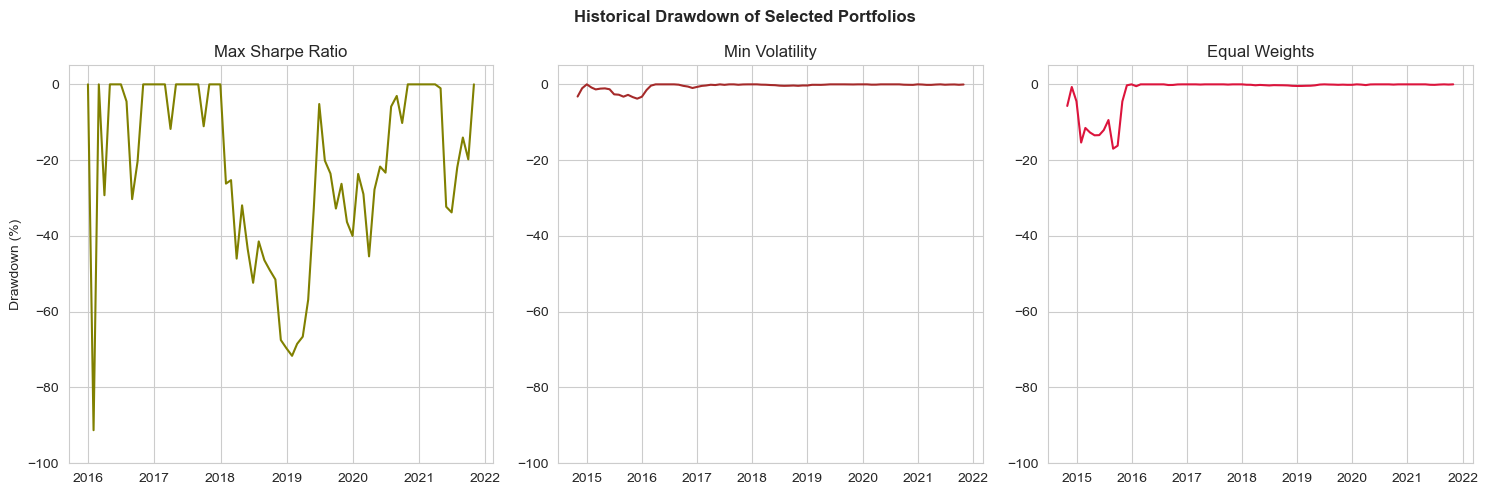

In [54]:

# Plot historical drawdowns
fig, ax = plt.subplots(1,3, figsize=(15,5))
fig.suptitle('Historical Drawdown of Selected Portfolios', fontweight='bold')
label_position='lower right'

ax[0].plot(msr_drawdown[msr_drawdown > -1]*100, color='olive')
ax[0].set_ylabel('Drawdown (%)')
ax[0].set_title('Max Sharpe Ratio')
ax[0].set_ylim(-100,5)

ax[1].plot(gmv_drawdown, color='brown')
ax[1].set_ylabel('')
ax[1].set_title('Min Volatility')
ax[1].set_ylim(-100,5)

ax[2].plot(eq_drawdown, color='crimson')
ax[2].set_ylabel('')
ax[2].set_title('Equal Weights')
ax[2].set_ylim(-100,5)

plt.tight_layout()
plt.show()

##### The maximum historical drawdown of the MSR portfolio, would have occured in 2019 during what has been dubbed the 'crypto winter'. As shown by the figure above, the MSR portfolio slumped 71% from its previous high before climbing back up to previous highs. The conservative GMV portfolio and equal Portfolio shows a tendency for low volatility, reaching a maximum drawdown of 9% from previous highs in 2015. According to this measure of risk, the fund manager should prefer the low volatility GMV portfolio.

### Monte Carlo Simulation

In [130]:
# Parameters
s0 = 10000  # Initial investment amount
num_periods = 12  # Number of periods (months)
num_simulations = 10000  # Number of simulations

In [131]:
# Maximum Sharpe Ratio
msr_return_mu = np.mean(asset_return_portfolio['MSR_Return'])
msr_return_std= np.std(asset_return_portfolio['MSR_Return'])
msr_forecasted_returns = np.random.normal(msr_return_mu, msr_return_std, num_periods)

# Min Volatility
gmv_return_mu = np.mean(asset_return_portfolio['GMV_Return'])
gmv_return_std= np.std(asset_return_portfolio['GMV_Return'])
gmv_forecasted_returns = np.random.normal(gmv_return_mu, gmv_return_std, num_periods)

# Equal Weights
eq_return_mu = np.mean(asset_return_portfolio['Equal_Return'])
eq_return_std= np.std(asset_return_portfolio['Equal_Return'])
eq_forecasted_returns = np.random.normal(eq_return_mu, eq_return_std, num_periods)

In [132]:
gmv_forecasted_series = []
msr_forecasted_series = []
eq_forecasted_series = []

In [133]:
for i in range(num_simulations):
    # Min Volatility
    gmv_forecasted_returns = np.random.normal(gmv_return_mu, gmv_return_std, num_periods) + 1
    gmv_forecasted_series.append(s0*(gmv_forecasted_returns.cumprod()))
    # Max Sharpe
    msr_forecasted_returns = np.random.normal(msr_return_mu, msr_return_std, num_periods) + 1
    msr_forecasted_series.append(s0*(msr_forecasted_returns.cumprod()))
    # Equal Weights
    eq_forecasted_returns = np.random.normal(eq_return_mu, eq_return_std, num_periods) + 1
    eq_forecasted_series.append(s0*(eq_forecasted_returns.cumprod()))

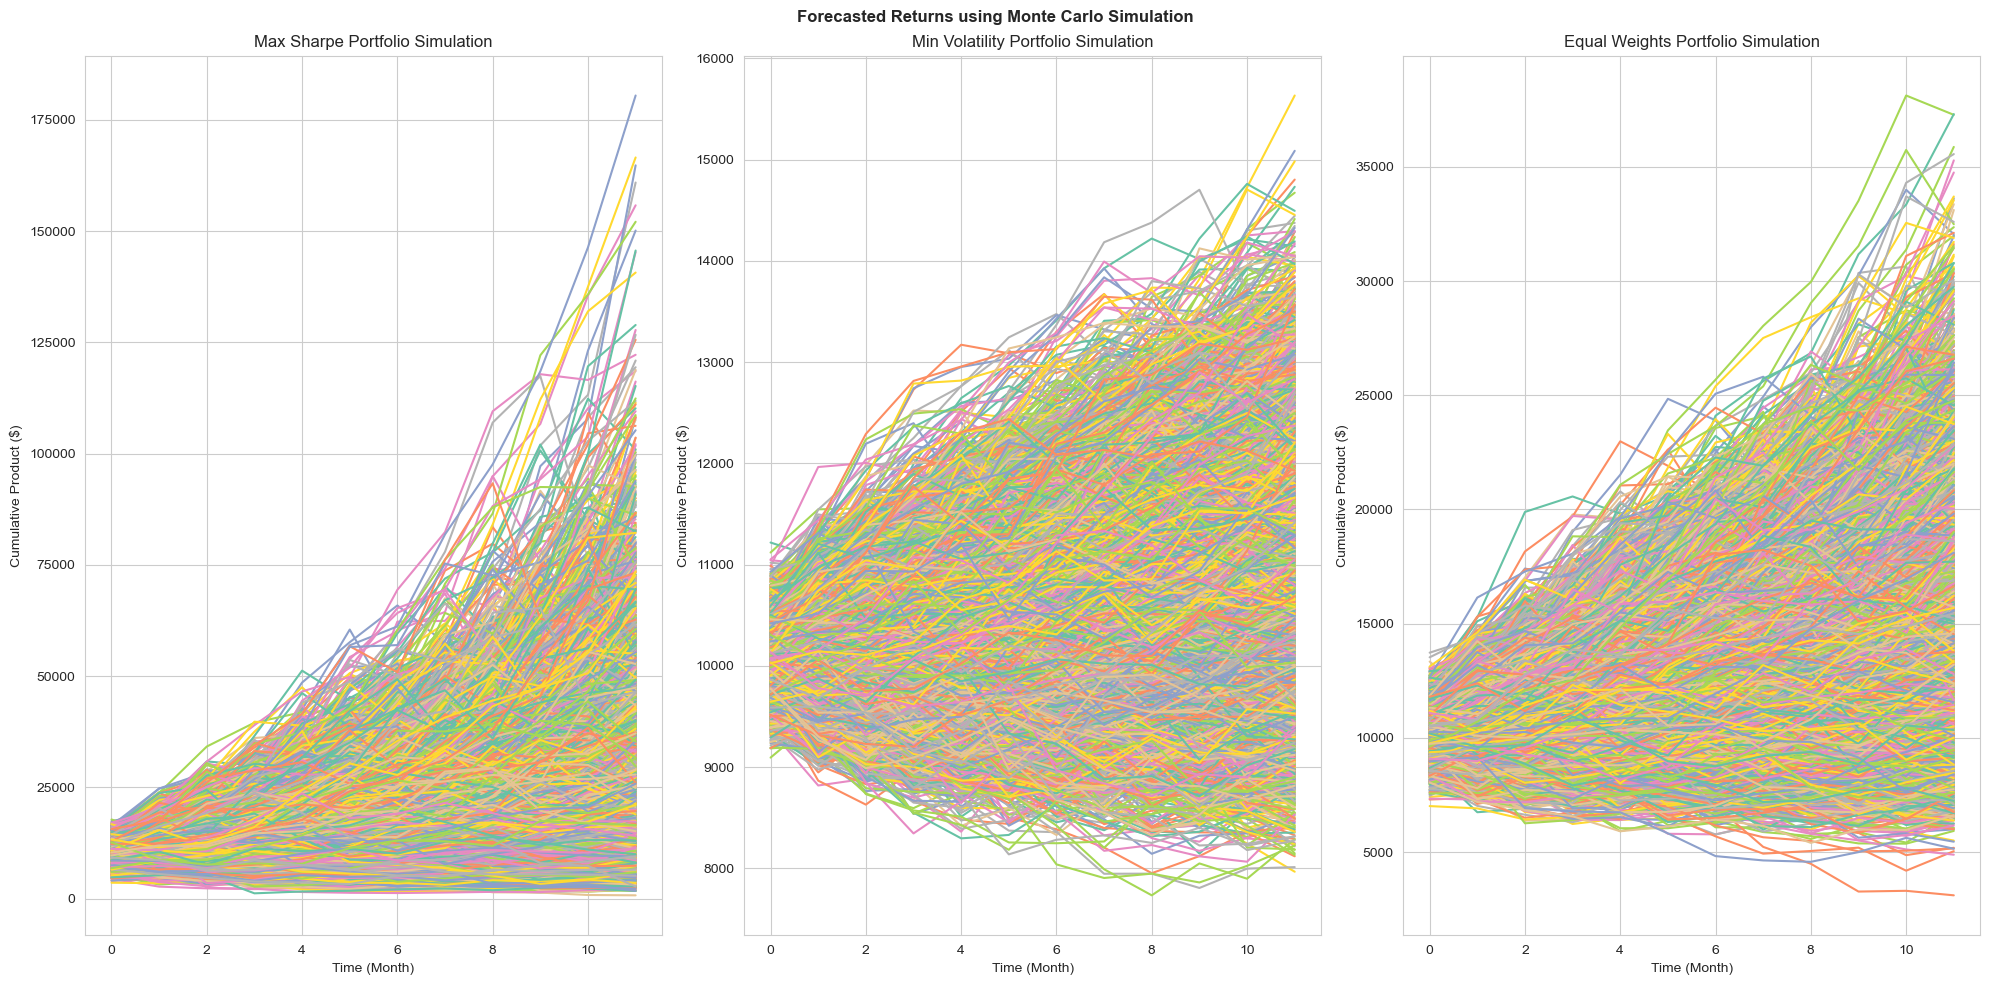

In [139]:
# Plot Monte Carlo simulations
fig, ax = plt.subplots(1,3, figsize=(20,10))
fig.suptitle('Forecasted Returns using Monte Carlo Simulation', fontweight='bold')
x_label='Time (Month)'
y_label='Cumulative Product ($)'

for ser0 in msr_forecasted_series:
    ax[0].plot(ser0)
ax[0].set_ylabel(y_label)
ax[0].set_xlabel(x_label)
ax[0].set_title('Max Sharpe Portfolio Simulation')

for ser1 in gmv_forecasted_series:
    ax[1].plot(ser1)
ax[1].set_ylabel(y_label)
ax[1].set_xlabel(x_label)
ax[1].set_title('Min Volatility Portfolio Simulation')

for ser2 in eq_forecasted_series:
    ax[2].plot(ser2)
ax[2].set_ylabel(y_label)
ax[2].set_xlabel(x_label)
ax[2].set_title('Equal Weights Portfolio Simulation')

plt.tight_layout()
plt.show()

In [138]:
# Max Sharpe Analysis 
msr_mean = round(np.mean(msr_forecasted_series))
msr_max = round(np.max(msr_forecasted_series))
msr_min = round(np.min(msr_forecasted_series))

# Min Volatility Analysis 
gmv_mean = round(np.mean(gmv_forecasted_series))
gmv_max = round(np.max(gmv_forecasted_series))
gmv_min = round(np.min(gmv_forecasted_series))

# Equal Weight Analysis 
eq_mean = round(np.mean(eq_forecasted_series))
eq_max = round(np.max(eq_forecasted_series))
eq_min = round(np.min(eq_forecasted_series))

print('------ Max Sharpe Portfolio ------')
print('Mean : ',msr_mean)
print('Max  : ',msr_max)
print('Min  : ',msr_min)
print('\n------ Min Volatility Portfolio ------')
print('Mean : ',gmv_mean)
print('Max  : ',gmv_max)
print('Min  : ',gmv_min)
print('\n------ Equal Weight Portfolio ------')
print('Mean : ',eq_mean)
print('Max  : ',eq_max)
print('Min  : ',eq_min)

------ Max Sharpe Portfolio ------
Mean :  16398
Max  :  180478
Min  :  722

------ Min Volatility Portfolio ------
Mean :  10501
Max  :  15634
Min  :  7735

------ Equal Weight Portfolio ------
Mean :  12537
Max  :  38127
Min  :  3105


######  in the figures above, we've got 10,000 different possible paths for the Max Sharpe, Min Volatility and Equal Weight portfolios based on their past performance. It's like peeking into the crystal ball to estimate what could happen in the next 12 months if we started with 10,000 USD 

###### If we consider the Max Sharpe Portfolio, it's projected to generate an average return of 16,398 USD over the course of 12 months. The range of potential returns spans from 722 USD up to 180,478 USD. On the other hand, if we opt for the Min Volatility Portfolio, the estimated average return for the same period is around 15,634 USD, with a range between 10,501 USD and 7,735 USD. Alternatively, the equal-weighted portfolio is expected to yield an average return of approximately 12,537 USD in 12 months, with potential returns ranging from 3,105 USD to 38,127 USD. It's important to note that these estimates are based on simulations, and the actual results may deviate.